In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("prepared_dataset.csv")
data=df.copy()
data

,Name,AC,HP,Strength,Dexterity,Constitution,Intelligence,Wisdom,Charisma,Saving Throws,...,Condition Immunities,CR,gargantuan,huge,large,medium,or,small,tiny,Overall
0,Aarakocra,12,0.576923,10,14,10,11,12,11,0,...,0,0.250,0,0,0,1,0,0,0,68
1,Aarakocra Simulacrum,12,0.266272,10,14,10,11,12,11,0,...,0,0.125,0,0,0,1,0,0,0,68
2,Aarakocra Spelljammer,12,1.775148,9,14,11,17,12,11,2,...,0,6.000,0,0,0,1,0,0,0,74
3,Aartuk Elder,16,3.328402,18,10,15,12,14,12,0,...,0,2.000,0,0,1,0,0,0,0,81
4,Aartuk Starhorror,14,2.307692,12,10,14,13,16,10,0,...,0,2.000,0,0,0,1,0,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,Zombie,8,0.976331,13,6,16,3,6,5,1,...,1,0.250,0,0,0,1,0,0,0,49
1823,Zombie Clot,12,4.615385,20,10,16,3,8,10,1,...,6,6.000,0,1,0,0,0,0,0,67
1824,Zombie Plague Spreader,10,3.461538,16,10,15,3,5,5,0,...,3,4.000,0,0,0,1,0,0,0,54
1825,Zorbo,10,1.198225,13,11,13,3,12,7,0,...,0,0.500,0,0,0,0,0,1,0,59


In [2]:
del data['Charisma']
del data['Dexterity']
del data['Intelligence']
del data['Strength']
del data['Wisdom']
del data['Constitution']
del data['Name']

data

,AC,HP,Saving Throws,Skills,Damage Vulnerabilities,Damage Resistances,Damage Immunities,Condition Immunities,CR,gargantuan,huge,large,medium,or,small,tiny,Overall
0,12,0.576923,0,1,0,0,0,0,0.250,0,0,0,1,0,0,0,68
1,12,0.266272,0,1,0,0,0,0,0.125,0,0,0,1,0,0,0,68
2,12,1.775148,2,2,0,0,0,0,6.000,0,0,0,1,0,0,0,74
3,16,3.328402,0,0,0,0,0,0,2.000,0,0,1,0,0,0,0,81
4,14,2.307692,0,1,0,0,0,0,2.000,0,0,0,1,0,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,8,0.976331,1,0,0,0,1,1,0.250,0,0,0,1,0,0,0,49
1823,12,4.615385,1,0,0,0,1,6,6.000,0,1,0,0,0,0,0,67
1824,10,3.461538,0,0,0,1,1,3,4.000,0,0,0,1,0,0,0,54
1825,10,1.198225,0,1,0,0,0,0,0.500,0,0,0,0,0,1,0,59


## Splitting the dataset

In [3]:
X=data.drop(columns=['CR'])
y=data['CR']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Bayesian Ridge Regressor

Bayesian Ridge:  1.2159451530897432   3.665522625288791   1.9145554641453433


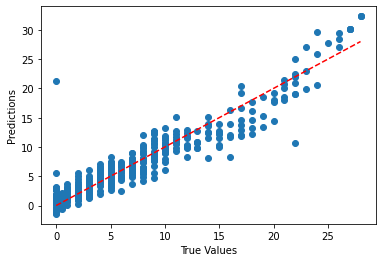

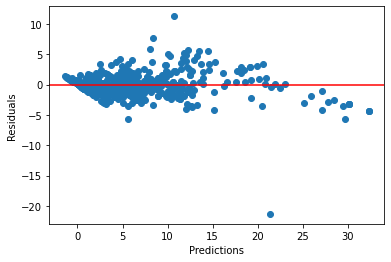

In [10]:
from sklearn import linear_model
reg=linear_model.BayesianRidge()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Bayesian Ridge: ",mae," ",mse," ",rmse)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print("")

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()


## Linear Lasso Regressor

Lasso:  1.2135419178107767   3.6082840761292183   1.8995483874145502


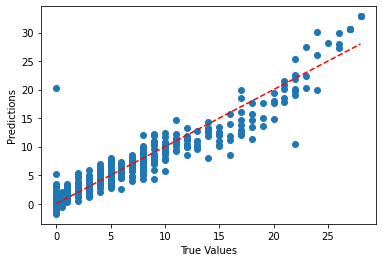

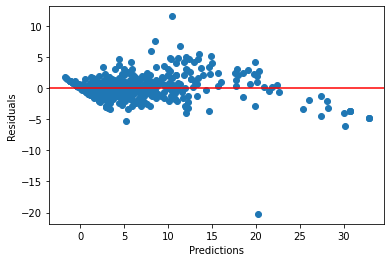

In [11]:
from sklearn import linear_model
lasso=linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

y_pred=lasso.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Lasso: ",mae," ",mse," ",rmse)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print("")

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()


## Support Vector Machine Regressor

SVR:  1.4540057332585583   4.780385130935265   2.1864091865282824


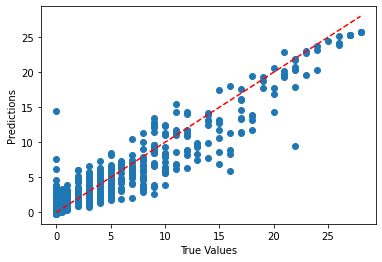

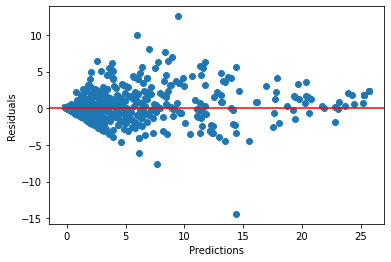

In [12]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train,y_train)

y_pred=svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("SVR: ",mae," ",mse," ",rmse)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print("")

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()


## Decision Tree Regressor

Tree:  1.1712962962962965   4.345733715680855   2.084642347185928


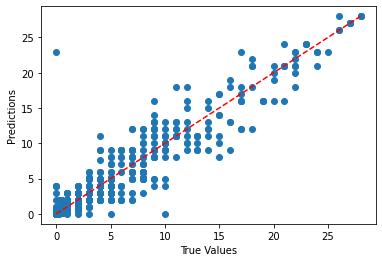

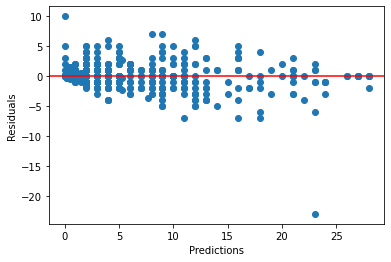

In [13]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Tree: ",mae," ",mse," ",rmse)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print("")

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()


## Elastic Net Regressor

Elastic:  1.32114300713406   3.8632983699137755   1.9655275042374185


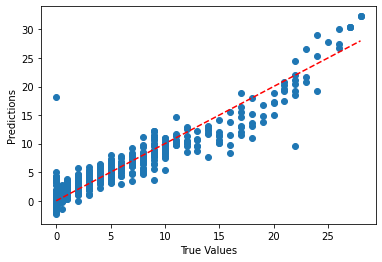

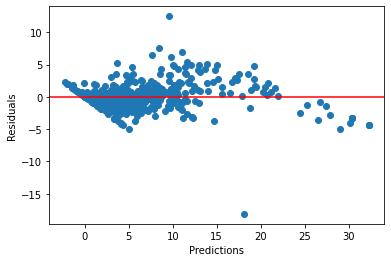

In [14]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Elastic: ",mae," ",mse," ",rmse)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print("")

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()


In [ ]:
monster={"AC":14,"HP":0.002,"Saving Throws":0,"Skills":0,"Damage Vulnerabilities":0,"Damage Resistances":0,"Damage Immunities":0,"Condition Immunities":0,"gargantuan":0,"huge":0,"large":0,"medium":0,"or":0,"small":0,"tiny":1,"Overall":83}
df_monster=pd.DataFrame.from_dict(monster, orient="index").T

df_monster

print(lasso.predict(df_monster))

[0.91444851]


By looking at the metrics and the graph, we can say that the Lasso Regressor best adapts to the problem since it has the lowest MAE, MSE, RMSE and the results on the graph are more clustered on the diagonal of the graph.

## Exporting the model
We now export the model using joblib

In [ ]:
import joblib

filename = 'model.sav'
joblib.dump(lasso, filename)

['model.sav']